<a href="https://colab.research.google.com/github/rmiller34/ATMS-597-SP-2020/blob/master/ATMS_597_Project_2_Miller_Edits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import datetime

In [0]:
import requests

def make_request(endpoint, payload=None):
    """
    Make a request to a specific endpoint on the weather API
    passing headers and optional payload.
    
    Parameters:
        - endpoint: The endpoint of the API you want to 
                    make a GET request to.
        - payload: A dictionary of data to pass along 
                   with the request.
    
    Returns:
        Response object.
    """
    return requests.get(
        f'https://www.ncdc.noaa.gov/cdo-web/api/v2/'+endpoint,
        headers={
            'token': 'yicVcIaiwUAgtBveaBtWSaioiQvqRJRh'
        },
        params=payload
    )

In [0]:
# This cell will request locations. We used this to find the locationid for Champaign, IL area.
# !!!No need to run this cell again unless we want to look up a new locationid!!!

response = make_request(
    'locations', 
    {
        'datasetid' : 'GHCND', 
        'locationcategoryid' : 'CITY',
        'datacategoryid' : 'TEMP',
        'sortorder' : 'desc',
        'limit' : 1000 # max allowed
    }
)
response.json()

In [0]:
# This cell will request stations. We used this to find the stationid for Rantoul, IL station.
# !!!No need to run this cell again unless we want to look up a new stationid!!!

response = make_request(
    'stations', 
    {
        'datasetid' : 'GHCND',
        'locationid' : 'CITY:US170004', 
        'datacategoryid' : 'TEMP',
        'limit' : 1000 # max allowed
    }
)
response.json()

In [0]:
response.json()

NameError: ignored

In [0]:
# Create lists containing the beginning and end of years we want to loop over.
# Clunky for now, can probably make this smoother using some kind of loop to add one to the year each time


currentlist = [datetime.date(2010, 1, 1), datetime.date(2011, 1, 1), datetime.date(2012, 1, 1), datetime.date(2013, 1, 1), datetime.date(2014, 1, 1),datetime.date(2015, 1, 1), datetime.date(2016, 1, 1), datetime.date(2017, 1, 1), datetime.date(2018, 1, 1), datetime.date(2019, 1, 1)]
endlist = [datetime.date(2010, 12, 31), datetime.date(2011, 12, 31), datetime.date(2012, 12, 31), datetime.date(2013, 12, 31), datetime.date(2014, 12, 31), datetime.date(2015, 12, 31), datetime.date(2016, 12, 31), datetime.date(2017, 12, 31), datetime.date(2018, 12, 31),datetime.date(2019, 12, 31)]
currentlist = [datetime.date(2010, 1, 1), datetime.date(2011, 1, 1), datetime.date(2012, 1, 1), datetime.date(2013, 1, 1), datetime.date(2014, 1, 1), datetime.date(2015, 1, 1), datetime.date(2016, 1, 1), datetime.date(2017, 1, 1), datetime.date(2018, 1, 1), datetime.date(2019, 1, 1)]
endlist = [datetime.date(2010, 12, 31), datetime.date(2011, 12, 31), datetime.date(2012, 12, 31), datetime.date(2013, 12, 31), datetime.date(2014, 12, 31), datetime.date(2015, 12, 31), datetime.date(2016, 12, 31), datetime.date(2017, 12, 31), datetime.date(2018, 12, 31),datetime.date(2019, 12, 31)]

In [0]:
# Create lists containing the beginning and end of years we want to loop over.
 
yearstoget = np.arange(1949,2020)
currentlist = []
endlist = []
for i in yearstoget:
    currentlist.append(datetime.date(i, 1, 1))
    endlist.append(datetime.date(i, 12, 31))

In [0]:
# This cell will request the data

results = [] # get an empty list to fill with data
numloops = np.arange(len(currentlist)) # fill a numper array with the length of the list of years we want

#Start the loop over the years we want
for i in numloops:
    current = currentlist[i] # set current to the beginning of the year in our loop
    end = endlist[i] # set end to the end of the year in our loop
    # update the cell with status information
    #display.clear_output(wait=True)
    #display.display(f'Gathering data for {str(current)}')
    response = make_request(
        'data', 
        {
            'datasetid' : 'GHCND', # Global Historical Climatology Network - Daily (GHCND) dataset
            'datatypeid' : 'TMAX',
            'stationid' : 'GHCND:USW00014806',
            'startdate' : current,
            'enddate' : end,
            'units' : 'metric',
            'limit' : 1000 # max allowed
        }
    )
    response.json()
    results.extend(response.json()['results']) # put the data in the results list

In [5]:
len(results) # check the length of the results list to make sure we have the correct number of days

25399

In [7]:
# Put the results in a pandas dataframe
df = pd.DataFrame(results)
df.head()

,date,datatype,station,attributes,value
0,1949-01-01T00:00:00,TMAX,GHCND:USW00014806,",,0,",-0.6
1,1949-01-02T00:00:00,TMAX,GHCND:USW00014806,",,0,",2.8
2,1949-01-03T00:00:00,TMAX,GHCND:USW00014806,",,0,",4.4
3,1949-01-04T00:00:00,TMAX,GHCND:USW00014806,",,0,",10.0
4,1949-01-05T00:00:00,TMAX,GHCND:USW00014806,",I,0,",4.4


In [0]:
###Rylan's code for getting Yearly Average Temperature goes here. ###

In [0]:
df.to_csv('Rantoul.csv')

In [8]:

df = pd.DataFrame(results)
 
df['date']= pd.to_datetime(df['date']) 
df.index = df['date']
 
del df['datatype']
del df['station']
del df['attributes']
#del df['date']
 
df.columns = ['date','TMAX']
df.to_csv('project2_data_TMAX')
 
df.tail()

,date,TMAX
date,,
2019-12-27,2019-12-27,6.1
2019-12-28,2019-12-28,13.3
2019-12-29,2019-12-29,15.0
2019-12-30,2019-12-30,3.9
2019-12-31,2019-12-31,0.6


In [9]:
df = df.groupby(pd.Grouper(freq='Y')).mean()
df.columns = ['Yearly Average Temperature']
df.to_csv('project_2_Tavg')
df

,Yearly Average Temperature
date,
1949-12-31,17.221096
1950-12-31,15.105479
1951-12-31,15.106575
1952-12-31,17.024044
1953-12-31,17.877808
...,...
2015-12-31,17.356986
2016-12-31,18.389071
2017-12-31,18.874247


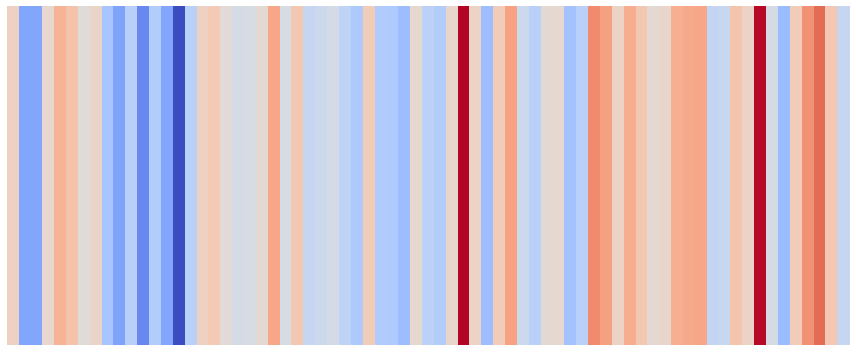

In [10]:


df = df.groupby(pd.Grouper(freq='Y')).mean()
df.index = pd.to_datetime(df.index, format='%Y-%m-%d').year
df.columns = ['Yearly Average Temperature']
df['Anomalies'] = (df['Yearly Average Temperature'] - df['Yearly Average Temperature'].mean())
df


import seaborn as sns
import matplotlib.pyplot as plt
 
#plt.figure(figsize=(12, 5))
fig, ax = plt.subplots(figsize=(12,5))
#ax2 = plt.twinx()
 
sns.heatmap(data=df['Anomalies'][np.newaxis,:], cmap='coolwarm', cbar=False, vmin= -3, vmax=3, center=0,
                 xticklabels=False, yticklabels=False, ax = ax)
sns.lineplot(x=df.index, y=df['Anomalies'], color='Black', ax = ax)
 
plt.tight_layout()
plt.show()



array([ 0.02926427, -0.32854395,  2.25435773, -0.88329632, -1.96525628,
       -0.14169464,  0.8903901 ,  1.37556564, -0.03374943, -1.1970371 ])

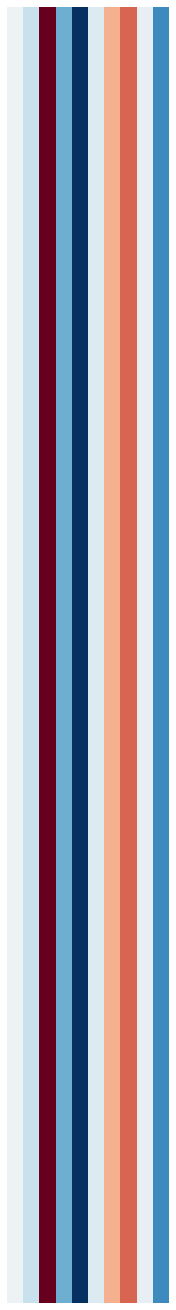

0    0.029264
1   -0.328544
2    2.254358
3   -0.883296
4   -1.965256
5   -0.141695
6    0.890390
7    1.375566
8   -0.033749
9   -1.197037
Name: Yearly Average Temperature, dtype: float64

In [0]:
# link https://matplotlib.org/matplotblog/posts/warming-stripes/?fbclid=IwAR3LquBo6VNlCuZdUE-7v58V5wLrK3Moxvg2qLEb6zj49qiCxiDRBFt0DB4

TypeError: ignored